# Basic image dataset augmentation with Keras

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [9]:
target_size = (64,64)
dataset_path="../my_datasets/cracks_splitted8020/"
training_path_prefix="train_set"
test_path_prefix="test_set"

In [132]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    zoom_range=0.3, 
    rotation_range=90,
    width_shift_range=0.05, 
    height_shift_range=0.05, 
    shear_range=0.2, 
    horizontal_flip=True, 
    vertical_flip=True, 
    channel_shift_range=50.0,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set_generator = train_datagen.flow_from_directory(
        dataset_path+training_path_prefix,
        target_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )
test_set_generator = test_datagen.flow_from_directory(
        dataset_path+test_path_prefix,
        target_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


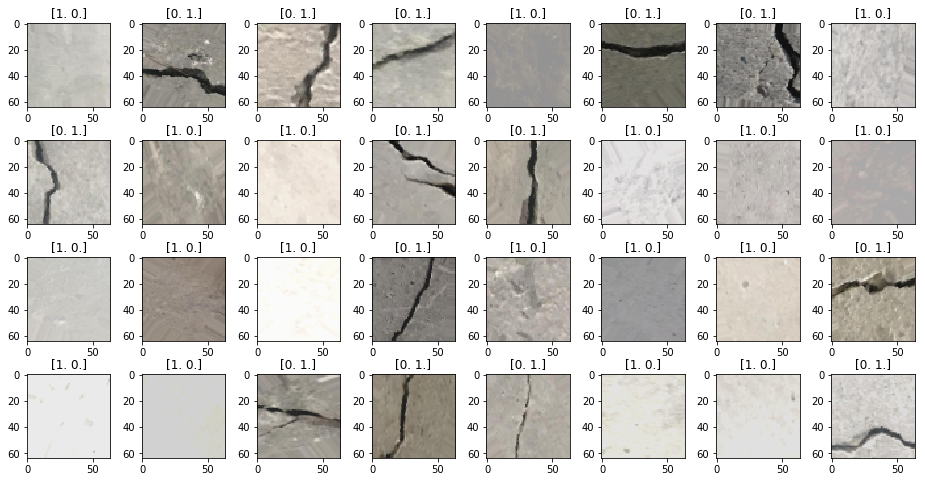

In [139]:
imgs,labels = training_set_generator.next()
n_rows = 4
n_cols = 8
_, axs = plt.subplots(n_rows,n_cols, figsize=(16, 8))
axs = axs.flatten()
for img, label, ax in zip(imgs,labels, axs):
    ax.imshow(img)
    ax.set_title(str(label))
plt.subplots_adjust(wspace=.3, hspace=.4)
plt.show()